In [1]:
import IPython
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving 01047u.tif to 01047u.tif
Saving 01657u.tif to 01657u.tif
Saving 01861a.tif to 01861a.tif


In [3]:
uploaded = files.upload()

Saving 00125v.jpg to 00125v.jpg
Saving 00149v.jpg to 00149v.jpg
Saving 00153v.jpg to 00153v.jpg
Saving 00351v.jpg to 00351v.jpg
Saving 00398v.jpg to 00398v.jpg
Saving 01112v.jpg to 01112v.jpg


#Basic alignment for jpg images using SSD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[2, 5]
[1, 10]
Runtime: 1.686 seconds
[2, 4]
[2, 9]
Runtime: 0.705 seconds
[3, 7]
[4, 14]
Runtime: 0.685 seconds
[1, 4]
[1, 13]
Runtime: 0.694 seconds
[3, 5]
[4, 11]
Runtime: 0.689 seconds
[0, 0]
[1, 5]
Runtime: 0.702 seconds


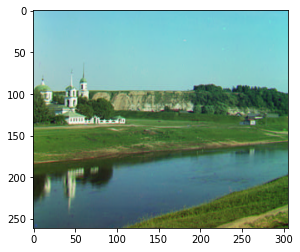

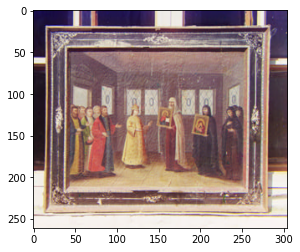

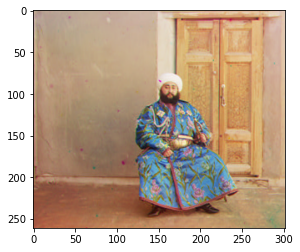

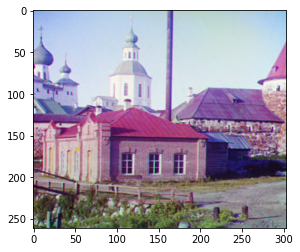

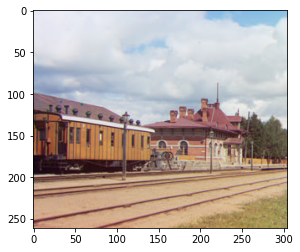

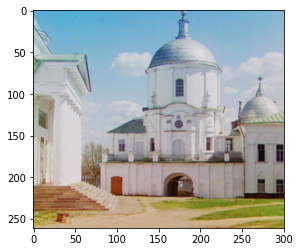

In [8]:
import time
from PIL import Image, ImageChops
import numpy as np
import math
import matplotlib.pyplot as plt

# Libraries for Downsmpling
import skimage.feature
import skimage as sk
import skimage.transform as sktr

def horizontal_shift(img, n):
  return np.roll(img, n, axis=1)

def vertical_shift(img, n):
  return np.roll(img, n, axis=0)

# aligns images using horizontal and vertical shift
def align(A, d):
  return horizontal_shift(vertical_shift(A, d[1]), d[0])

def ssd(a, b):
  return np.sum(np.sum((a^b)**2))

def ssdAlign(a, b, t = 15):

  a = sk.feature.canny(a)
  b = sk.feature.canny(b)

  dx = 0
  dy = 0
  min_ssd = ssd(a, b)
  
  for i in range(-1 * t, t):
    for j in range(-1 * t, t):
      displaced_img = align(a, [i, j])
      new_ssd = np.sum(np.sum((displaced_img^b)**2))
      if new_ssd < min_ssd:
        dx = i
        dy = j
        min_ssd = new_ssd
  print([dx, dy])
  return [dx, dy]

def crop(img):
  # get the width and height of the img and crop it
  w, h = img.shape
  img=img[int(w*0.075):int(w-w*0.075),int(h*0.075):int(h-h*0.075)]
  return img

def colorize(file):
  # Count the running time
  start_time = time.time()

  # Open the image and convert it to an array
  imname = file
  img=Image.open(imname)
  img=np.asarray(img)

  # Divid the height of the image array into 1/3
  height = np.floor(img.shape[0] / 3.0).astype(np.int)
  b = img[ : height]
  g = img[height : 2 * height]
  r = img[2 * height : 3 * height]

  # Crop B, G, R image from the orignial image
  blue = crop(b)
  green = crop(g)
  red = crop(r)

  # Get the offset of b and g
  dis_green = ssdAlign(green, blue)
  # Get the offset of gb and r
  dis_red = ssdAlign(red, blue)

  # Align original images relative to rescaled image displacement
  new_green = align(green, [dis_green[0], dis_green[1]])
  new_red = align(red, [dis_red[0], dis_red[1]])

  # Convert to color image
  img = (np.dstack((new_red, new_green, blue)))

  if file.split('.')[1] == 'jpg':
    img = img.astype(np.uint8)
  elif file.split('.')[1] == 'tif':
    img = (img/255).astype(np.uint8)

  # Crop the image to remove the black border
  img = img[int(img.shape[0]*0.05):int(img.shape[0]-img.shape[0]*0.05),int(img.shape[1]*0.05):int(img.shape[1]-img.shape[1]*0.05)]
  colorized = Image.fromarray(img)
  saveName = file.split('.')[0] + '.jpeg'
  #colorized.save(saveName)
  plt.figure()
  plt.imshow(colorized)

  # Print the running time
  print("Runtime: %.5s seconds" % (time.time() - start_time))

# test each photo, get the offset, runtime, and colorized output
import os
file = "00125v.jpg"
colorize(file)
file = "00149v.jpg"
colorize(file)
file = "00153v.jpg"
colorize(file)
file = "00351v.jpg"
colorize(file)
file = "00398v.jpg"
colorize(file)
file = "01112v.jpg"
colorize(file)


#Multiscale alignment for jpg images using SSD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[[24, 26], [38, 74]]
Runtime: 27.61 seconds
[[8, 56], [12, 118]]
Runtime: 27.93 seconds
[[36, 72], [60, 148]]
Runtime: 27.77 seconds
[[2, 4], [2, 8]]
Runtime: 0.344 seconds
[[2, 4], [2, 10]]
Runtime: 0.321 seconds
[[2, 6], [2, 14]]
Runtime: 0.318 seconds
[[0, 4], [0, 14]]
Runtime: 0.313 seconds
[[4, 6], [6, 12]]
Runtime: 0.313 seconds
[[0, 0], [2, 6]]
Runtime: 0.313 seconds


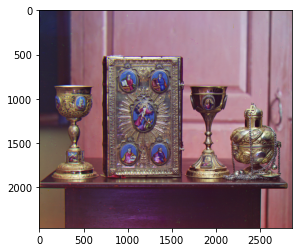

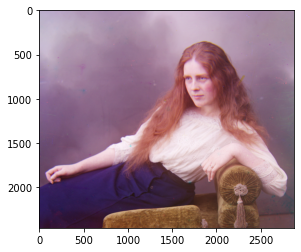

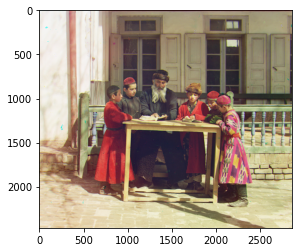

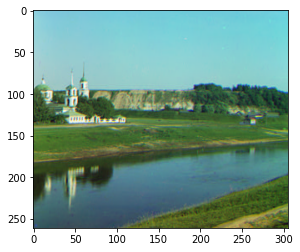

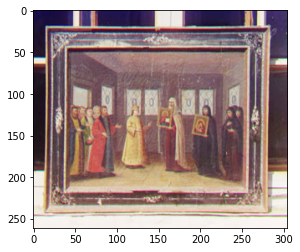

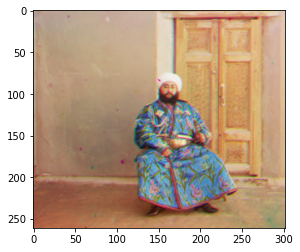

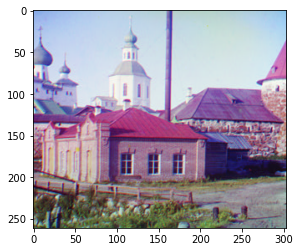

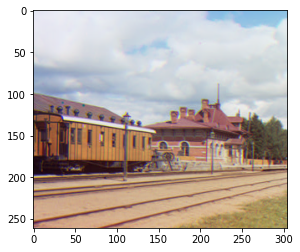

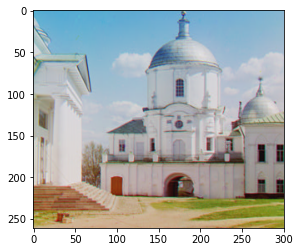

In [5]:
import time

from PIL import Image, ImageChops
import numpy as np
import math
import matplotlib.pyplot as plt

# Libraries for Downsmpling
import skimage.feature
import skimage as sk
import skimage.transform as sktr


# Horizontal Alignment
def horizontal_shift(img, n):
  return np.roll(img, n, axis=1)

# Vertical alignment
def vertical_shift(img, n):
  return np.roll(img, n, axis=0)

# Aligns images
def align(A, d):
  return horizontal_shift(vertical_shift(A, d[1]), d[0])

# Returns displacement values
def get_displacement(A, B, t = 15):
  
  dx = 0
  dy = 0

  # Initial the ssd
  min_ssd = np.sum(np.sum((A^B)**2))

  for i in range(-1 * t, t):
    for j in range(-1 * t, t):

      displaced_img = align(A, [i,j]) 
      # Get the new ssd
      new_ssd = np.sum(np.sum((displaced_img^B)**2))
      if new_ssd < min_ssd:
        dx = i
        dy = j
        min_ssd = new_ssd
  return [dx, dy]

def pyramid_align(r, g, b, num_runs, displacements):

  # Base case
  if num_runs == 0:
    # Print the final offset
    print(displacements)
    # Convert to color image
    return np.dstack((r,g,b))

  factor = 2 ** num_runs

  # Downsampling the images
  rescale_r = sk.feature.canny(sktr.rescale(r, 1 / factor), 3)
  rescale_g = sk.feature.canny(sktr.rescale(g, 1 / factor), 3)
  rescale_b = sk.feature.canny(sktr.rescale(b, 1 / factor), 3)

  # Get the offset of b and g
  dis_green = get_displacement(rescale_g, rescale_b)
  # Align g to b
  align_g2b = align(rescale_g, dis_green)
  # Get the offset of gb and r
  dis_red = get_displacement(rescale_r, align_g2b)

  # align original images relative to rescaled image displacement
  g = align(g, [dis_green[0] * factor, dis_green[1] * factor])
  r = align(r, [dis_red[0] * factor, dis_red[1] * factor])

  # first row is green displacement
  # second row is red displacement
  # multiply to keep track of displacement
  displacements[0][0] += dis_green[0] * factor
  displacements[0][1] += dis_green[1] * factor
  displacements[1][0] += dis_red[0] * factor
  displacements[1][1] += dis_red[1] * factor

  return pyramid_align(r, g, b, num_runs-1, displacements)

def crop(img):
  # get the width and height of the img and crop it
  w, h = img.shape
  img=img[int(w*0.075):int(w-w*0.075),int(h*0.075):int(h-h*0.075)]
  return img

def colorize(file):
  # Count the running time
  start_time = time.time()

  # Rename the file to .jpg if the file is end with .tif
  imname = file

  # Open the image and convert it to an array
  img=Image.open(imname)
  img=np.asarray(img)

  # Divid the height of the image array into 1/3
  height = np.floor(img.shape[0] / 3.0).astype(np.int)
  b = img[ : height]
  g = img[height : 2 * height]
  r = img[2 * height : 3 * height]

  # Crop B, G, R image from the orignial image
  b = crop(b)
  g = crop(g)
  r = crop(r)

  # Count how many levels should the image pyramid have
  num_runs = math.floor(math.log2(b.shape[1] / 100))

  # Initial the displacements array
  displacements = [[0, 0], [0, 0]]

  # Convert the colorized image and show
  img = pyramid_align(r, g, b, num_runs, displacements)
  
  if file.split('.')[1] == 'jpg':
    img = img.astype(np.uint8)
  elif file.split('.')[1] == 'tif':
    img = (img/255).astype(np.uint8)

  # Crop the image to remove the black border
  img = img[int(img.shape[0]*0.05):int(img.shape[0]-img.shape[0]*0.05),int(img.shape[1]*0.05):int(img.shape[1]-img.shape[1]*0.05)]
  colorized = Image.fromarray(img)
  saveName = file.split('.')[0] + '.jpeg'
  #colorized.save(saveName)
  plt.figure()
  plt.imshow(colorized)

  # Print the running time
  print("Runtime: %.5s seconds" % (time.time() - start_time))

# test each photo, get the offset, runtime, and colorized output
import os
file = "01047u.tif"
colorize(file)
file = "01657u.tif"
colorize(file)
file = "01861a.tif"
colorize(file)
file = "00125v.jpg"
colorize(file)
file = "00149v.jpg"
colorize(file)
file = "00153v.jpg"
colorize(file)
file = "00351v.jpg"
colorize(file)
file = "00398v.jpg"
colorize(file)
file = "01112v.jpg"
colorize(file)

#Basic alignment for jpg images using NCC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[5, 2]
[9, 1]
Runtime: 3.691 seconds
[4, 2]
[9, 2]
Runtime: 3.560 seconds
[7, 3]
[13, 5]
Runtime: 3.576 seconds
[4, 1]
[13, 1]
Runtime: 3.591 seconds
[5, 3]
[11, 4]
Runtime: 3.633 seconds
[0, 0]
[5, 1]
Runtime: 3.642 seconds


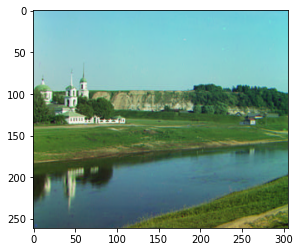

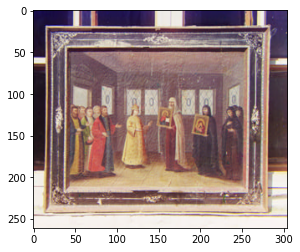

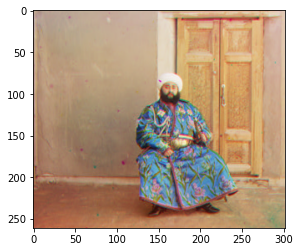

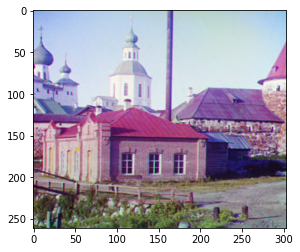

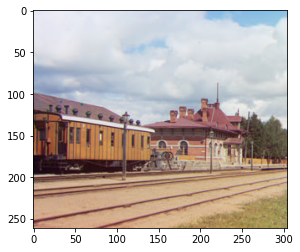

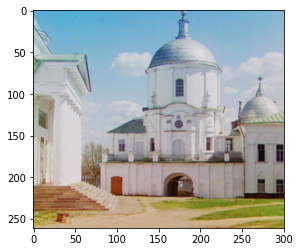

In [6]:
import time

from PIL import Image, ImageChops
import numpy as np
import math
import matplotlib.pyplot as plt

def ncc(a,b):
  a=a-a.mean(axis=0)
  b=b-b.mean(axis=0)
  return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))

def nccAlign(a, b, t = 15):
  min_ncc = -1
  ivalue=np.linspace(-t,t,2*t,dtype=int)
  jvalue=np.linspace(-t,t,2*t,dtype=int)
  for i in ivalue:
    for j in jvalue:
        nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
        if nccDiff > min_ncc:
          min_ncc = nccDiff
          output = [i,j]
  print(output)
  return output

def crop(img):
  # get the width and height of the img and crop it
  w, h = img.shape
  img=img[int(w*0.075):int(w-w*0.075),int(h*0.075):int(h-h*0.075)]
  return img

def colorize(file):
  # Count the running time
  start_time = time.time()

  # Rename the file to .jpg if the file is end with .tif
  imname = file
  name = file.split('.')[0] + '.jpg'

  # Open the image and convert it to an array
  img=Image.open(imname)
  img=np.asarray(img)

  # Divid the height of the image array into 1/3
  height = np.floor(img.shape[0] / 3.0).astype(np.int)
  b = img[ : height]
  g = img[height : 2 * height]
  r = img[2 * height : 3 * height]
  # Crop B, G, R image from the orignial image
  blue = crop(b)
  green = crop(g)
  red = crop(r)

  align_g2b = nccAlign(blue,green)
  align_r2b = nccAlign(blue,red)

  g = np.roll(green, align_g2b, axis=(0,1))
  r = np.roll(red, align_r2b, axis=(0,1))
  img = (np.dstack((r,g,blue)))

  if file.split('.')[1] == 'jpg':
    img = img.astype(np.uint8)
  elif file.split('.')[1] == 'tif':
    img = (img/255).astype(np.uint8)

  # Crop the image to remove the black border
  img = img[int(img.shape[0]*0.05):int(img.shape[0]-img.shape[0]*0.05),int(img.shape[1]*0.05):int(img.shape[1]-img.shape[1]*0.05)]
  colorized = Image.fromarray(img)
  saveName = file.split('.')[0] + '.jpeg'
  #colorized.save(saveName)
  plt.figure()
  plt.imshow(colorized)

  # Print the running time
  print("Runtime: %.5s seconds" % (time.time() - start_time))

# test each photo, get the offset, runtime, and colorized output
import os
file = "00125v.jpg"
colorize(file)
file = "00149v.jpg"
colorize(file)
file = "00153v.jpg"
colorize(file)
file = "00351v.jpg"
colorize(file)
file = "00398v.jpg"
colorize(file)
file = "01112v.jpg"
colorize(file)

#Multiscale alignment for tif images using NCC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[[26, 24], [72, 34]]
Runtime: 130.0 seconds
[[56, 8], [118, 12]]
Runtime: 131.3 seconds
[[74, 40], [150, 62]]
Runtime: 129.1 seconds


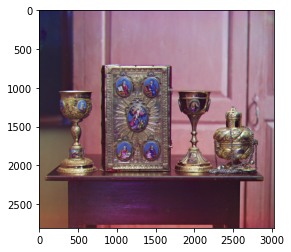

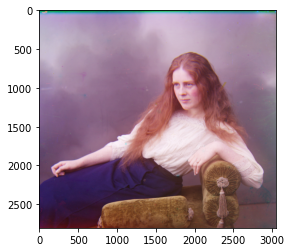

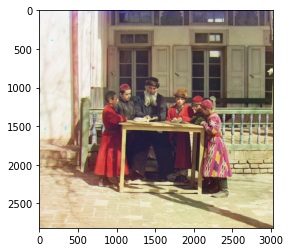

In [7]:
import time
from PIL import Image, ImageChops
import numpy as np
import math
import matplotlib.pyplot as plt

#libraries for down sampling the images
import skimage as sk
import skimage.feature
import skimage.transform as sktr



# crops the outer 15% of the image. maintains inner 85%
def crop_center(img):
  # get the width and height of the img and crop it
  w, h = img.shape
  img=img[int(w*0.01):int(w-w*0.02),int(h*0.05):int(h-h*0.05)]
  return img

# performs edge detection using canny filtering
def get_edges(A):
  return sk.feature.canny(A, 3)

def pyramid_align(r, g, b, num_runs, displacements):

  # base case
  if num_runs == 0:
    print(displacements)
    return np.dstack((r,g,b))

  factor = 2 ** num_runs

  # rescale the images
  new_r = get_edges(sktr.rescale(r, 1 / factor))
  new_g = get_edges(sktr.rescale(g, 1 / factor))
  new_b = get_edges(sktr.rescale(b, 1 / factor))

  ag_d = get_displacement(new_b, new_g)
  
  ar_d = get_displacement(new_b, new_r)

  # align original images relative to rescaled image displacement
  g = align(g, [ag_d[0] * factor, ag_d[1] * factor])
  r = align(r, [ar_d[0] * factor, ar_d[1] * factor])

  # first row is green displacement
  # second row is red displacement
  # multiply to keep track of displacement
  displacements[0][0] += ag_d[0] * factor
  displacements[0][1] += ag_d[1] * factor
  displacements[1][0] += ar_d[0] * factor
  displacements[1][1] += ar_d[1] * factor

  return pyramid_align(r, g, b, num_runs-1, displacements)


def horizontal_shift(img, n):
  return np.roll(img, n, axis=1)

def vertical_shift(img, n):
  return np.roll(img, n, axis=0)

def ncc(a,b):
  a=a-a.mean(axis=0)
  b=b-b.mean(axis=0)
  return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))

# returns best dx dy displacement
def get_displacement(a, b, t = 15):
  min_ncc = -1

  ivalue=np.linspace(-t,t,2*t,dtype=int)
  jvalue=np.linspace(-t,t,2*t,dtype=int)

  for i in ivalue:
    for j in jvalue:
      nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
      if nccDiff > min_ncc:
        min_ncc = nccDiff
        output = [i,j]
  return output

# aligns images using horizontal and vertical shift
def align(A, d):
  #return horizontal_shift(vertical_shift(A, d[1]), d[0])
  return np.roll(A, d, axis=(0,1))

# calls the appropriate functions for image processing
# cropping, image pyramid, output
def colorize(file):
  # run a timer
  start_time = time.time()

  name = file.split('.')[0] + '.jpg'
  imname = file

  # Open the image and convert it to an array
  img=Image.open(imname)
  img=np.asarray(img)

  # compute the height of each part (just 1/3 of total)
  height = np.floor(img.shape[0] / 3.0).astype(np.int)

  # separate color channels
  b = img[:height]
  g = img[height: 2 * height]
  r = img[2 * height: 3 * height]

  b = crop_center(b)
  g = crop_center(g)
  r = crop_center(r)

  # number of levels in image pyramid
  num_runs = math.floor(math.log2(b.shape[1] / 100))

  displacements = [[0, 0], [0, 0]]
  img = pyramid_align(r, g, b, num_runs, displacements)

  print("Runtime: %.5s seconds" % (time.time() - start_time))
    
  if file.split('.')[1] == 'jpg':
    img = img.astype(np.uint8)
  elif file.split('.')[1] == 'tif':
    img = (img/255).astype(np.uint8)

  # Crop the image to remove the black border
  img = img[int(img.shape[0]*0.05):int(img.shape[0]-img.shape[0]*0.05),int(img.shape[1]*0.05):int(img.shape[1]-img.shape[1]*0.05)]
  colorized = Image.fromarray(img)
  saveName = file.split('.')[0] + '.jpeg'
  #colorized.save(saveName)
  plt.figure()
  plt.imshow(colorized)
# read in all images and colorize them
import os
file = "01047u.tif"
colorize(file)
file = "01657u.tif"
colorize(file)
file = "01861a.tif"
colorize(file)
